## Imports

In [2]:
from constants import FLUXES_FOLDER, SLM_FOLDER

from data_utils import process_amp_phase_data

from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction, \
                       plot_conv_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           create_convolutional_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model

from configurations import FirstWorkingModel as ModelConfig

## Load data

In the first place, define the data paths

In [3]:
fluxes_filename = "all_fluxes.npy"
amplitudes_filename = "complexsine_pupamp.npy"
phases_filename = "complexsine_pupphase.npy"

fluxes_path = f"{FLUXES_FOLDER}/{fluxes_filename}"
amplitudes_path = f"{SLM_FOLDER}/{amplitudes_filename}"
phases_path = f"{SLM_FOLDER}/{phases_filename}"

In [4]:
train_fluxes_array, val_fluxes_array, train_amp_phase_array, val_amp_phase_array, scalers = \
    process_amp_phase_data(
        fluxes_path,
        amplitudes_path,
        phases_path,
        n_points=10000,
        trim_amplitude=True,
        trim_phase=True,
        normalize_flux=True,
        normalize_amplitude=True,
        shuffle=False,
        flatten_fluxes=True,
        split=True,
        val_ratio=0.1
    )

## FULLY CONNECTED

## Define configuration

In [5]:
model_configuration = ModelConfig(train_fluxes_array,
                                  train_fluxes_array)
print(model_configuration.get_description())


	=== AmplitudePhaseReconstructor1 ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Fully Connected
		-Input shape: (1320,)
		-Output shape: (1320,)
		-Hidden layers: [1024, 2048, 2048, 2048]
		-Regularizer: None
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: False
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 1000
		-Batch size: 128
		-Callbacks:
			-Early Stop: MSE 50
			-ReduceLROnPlateau: MSE 15 x0.1
	


2023-12-01 11:25:38.303760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 11:25:38.340472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 11:25:38.340741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Instantiate model

In [5]:
model = create_fully_connected_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


## Compile model

In [6]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

## Train model

In [7]:
history = train_model(
    model,
    train_fluxes_array,
    train_amp_phase_array,
    val_fluxes_array,
    val_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters()
)

2023-12-01 10:02:25.727153: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 663552000 exceeds 10% of free system memory.
2023-12-01 10:02:26.269258: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 663552000 exceeds 10% of free system memory.


Epoch 1/1000


2023-12-01 10:02:28.397416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-01 10:02:28.422340: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe8ad633c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-01 10:02:28.422372: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-01 10:02:28.451273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-01 10:02:28.696466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-01 10:02:28.893088: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

71/71 [==============================] - 4s 23ms/step - loss: 0.5270 - mean_squared_error: 0.5270 - val_loss: 0.5120 - val_mean_squared_error: 0.5120 - lr: 0.0010
Epoch 2/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4954 - mean_squared_error: 0.4954 - val_loss: 0.5119 - val_mean_squared_error: 0.5119 - lr: 0.0010
Epoch 3/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4948 - mean_squared_error: 0.4948 - val_loss: 0.5111 - val_mean_squared_error: 0.5111 - lr: 0.0010
Epoch 4/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4949 - mean_squared_error: 0.4949 - val_loss: 0.5167 - val_mean_squared_error: 0.5167 - lr: 0.0010
Epoch 5/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4952 - mean_squared_error: 0.4952 - val_loss: 0.5133 - val_mean_squared_error: 0.5133 - lr: 0.0010
Epoch 6/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4946 - mean_squared_error: 0.4946 - val_loss: 0.5108 - v

71/71 [==============================] - 1s 19ms/step - loss: 0.4881 - mean_squared_error: 0.4881 - val_loss: 0.5187 - val_mean_squared_error: 0.5187 - lr: 0.0010
Epoch 48/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4879 - mean_squared_error: 0.4879 - val_loss: 0.5222 - val_mean_squared_error: 0.5222 - lr: 0.0010
Epoch 49/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4874 - mean_squared_error: 0.4874 - val_loss: 0.5208 - val_mean_squared_error: 0.5208 - lr: 0.0010
Epoch 50/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4857 - mean_squared_error: 0.4857 - val_loss: 0.5234 - val_mean_squared_error: 0.5234 - lr: 0.0010
Epoch 51/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4857 - mean_squared_error: 0.4857 - val_loss: 0.5218 - val_mean_squared_error: 0.5218 - lr: 0.0010
Epoch 52/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.4853 - mean_squared_error: 0.4853 - val_loss: 0.523

71/71 [==============================] - 1s 19ms/step - loss: 0.2448 - mean_squared_error: 0.2448 - val_loss: 0.7316 - val_mean_squared_error: 0.7316 - lr: 0.0010
Epoch 94/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.2367 - mean_squared_error: 0.2367 - val_loss: 0.7233 - val_mean_squared_error: 0.7233 - lr: 0.0010
Epoch 95/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.2298 - mean_squared_error: 0.2298 - val_loss: 0.7268 - val_mean_squared_error: 0.7268 - lr: 0.0010
Epoch 96/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.2220 - mean_squared_error: 0.2220 - val_loss: 0.7436 - val_mean_squared_error: 0.7436 - lr: 0.0010
Epoch 97/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.2148 - mean_squared_error: 0.2148 - val_loss: 0.7280 - val_mean_squared_error: 0.7280 - lr: 0.0010
Epoch 98/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.2093 - mean_squared_error: 0.2093 - val_loss: 0.748

71/71 [==============================] - 1s 19ms/step - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.8180 - val_mean_squared_error: 0.8180 - lr: 0.0010
Epoch 140/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.8157 - val_mean_squared_error: 0.8157 - lr: 0.0010
Epoch 141/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.8052 - val_mean_squared_error: 0.8052 - lr: 0.0010
Epoch 142/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.8194 - val_mean_squared_error: 0.8194 - lr: 0.0010
Epoch 143/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.8215 - val_mean_squared_error: 0.8215 - lr: 0.0010
Epoch 144/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 

71/71 [==============================] - 1s 19ms/step - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.8291 - val_mean_squared_error: 0.8291 - lr: 0.0010
Epoch 186/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.8129 - val_mean_squared_error: 0.8129 - lr: 0.0010
Epoch 187/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.8237 - val_mean_squared_error: 0.8237 - lr: 0.0010
Epoch 188/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.8159 - val_mean_squared_error: 0.8159 - lr: 0.0010
Epoch 189/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.8149 - val_mean_squared_error: 0.8149 - lr: 0.0010
Epoch 190/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 

71/71 [==============================] - 1s 19ms/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.8192 - val_mean_squared_error: 0.8192 - lr: 0.0010
Epoch 232/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.8027 - val_mean_squared_error: 0.8027 - lr: 0.0010
Epoch 233/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.8092 - val_mean_squared_error: 0.8092 - lr: 0.0010
Epoch 234/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.8083 - val_mean_squared_error: 0.8083 - lr: 0.0010
Epoch 235/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.8037 - val_mean_squared_error: 0.8037 - lr: 0.0010
Epoch 236/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 

71/71 [==============================] - 1s 19ms/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.8082 - val_mean_squared_error: 0.8082 - lr: 0.0010
Epoch 278/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.8067 - val_mean_squared_error: 0.8067 - lr: 0.0010
Epoch 279/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.8102 - val_mean_squared_error: 0.8102 - lr: 0.0010
Epoch 280/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.8001 - val_mean_squared_error: 0.8001 - lr: 0.0010
Epoch 281/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.8011 - val_mean_squared_error: 0.8011 - lr: 0.0010
Epoch 282/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 

71/71 [==============================] - 1s 19ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.8144 - val_mean_squared_error: 0.8144 - lr: 1.0000e-04
Epoch 322/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.8146 - val_mean_squared_error: 0.8146 - lr: 1.0000e-04
Epoch 323/1000
71/71 [==============================] - 1s 20ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.8149 - val_mean_squared_error: 0.8149 - lr: 1.0000e-04
Epoch 324/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.8159 - val_mean_squared_error: 0.8159 - lr: 1.0000e-04
Epoch 325/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.8152 - val_mean_squared_error: 0.8152 - lr: 1.0000e-04
Epoch 326/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0391 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.8295 - val_mean_squared_error: 0.8295 - lr: 1.0000e-04
Epoch 367/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.8300 - val_mean_squared_error: 0.8300 - lr: 1.0000e-04
Epoch 368/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.8302 - val_mean_squared_error: 0.8302 - lr: 1.0000e-04
Epoch 369/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.8310 - val_mean_squared_error: 0.8310 - lr: 1.0000e-04
Epoch 370/1000
71/71 [==============================] - 1s 20ms/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.8314 - val_mean_squared_error: 0.8314 - lr: 1.0000e-04
Epoch 371/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0375 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.8455 - val_mean_squared_error: 0.8455 - lr: 1.0000e-04
Epoch 412/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.8465 - val_mean_squared_error: 0.8465 - lr: 1.0000e-04
Epoch 413/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.8467 - val_mean_squared_error: 0.8467 - lr: 1.0000e-04
Epoch 414/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.8457 - val_mean_squared_error: 0.8457 - lr: 1.0000e-04
Epoch 415/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.8473 - val_mean_squared_error: 0.8473 - lr: 1.0000e-04
Epoch 416/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0361 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.8599 - val_mean_squared_error: 0.8599 - lr: 1.0000e-04
Epoch 457/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.8610 - val_mean_squared_error: 0.8610 - lr: 1.0000e-04
Epoch 458/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.8616 - val_mean_squared_error: 0.8616 - lr: 1.0000e-04
Epoch 459/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.8611 - val_mean_squared_error: 0.8611 - lr: 1.0000e-04
Epoch 460/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.8622 - val_mean_squared_error: 0.8622 - lr: 1.0000e-04
Epoch 461/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0351 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.8743 - val_mean_squared_error: 0.8743 - lr: 1.0000e-04
Epoch 502/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.8749 - val_mean_squared_error: 0.8749 - lr: 1.0000e-04
Epoch 503/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.8743 - val_mean_squared_error: 0.8743 - lr: 1.0000e-04
Epoch 504/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.8744 - val_mean_squared_error: 0.8744 - lr: 1.0000e-04
Epoch 505/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.8756 - val_mean_squared_error: 0.8756 - lr: 1.0000e-04
Epoch 506/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0343 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.8876 - val_mean_squared_error: 0.8876 - lr: 1.0000e-04
Epoch 547/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.8871 - val_mean_squared_error: 0.8871 - lr: 1.0000e-04
Epoch 548/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.8866 - val_mean_squared_error: 0.8866 - lr: 1.0000e-04
Epoch 549/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.8883 - val_mean_squared_error: 0.8883 - lr: 1.0000e-04
Epoch 550/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.8876 - val_mean_squared_error: 0.8876 - lr: 1.0000e-04
Epoch 551/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0336 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.8995 - val_mean_squared_error: 0.8995 - lr: 1.0000e-04
Epoch 592/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.8991 - val_mean_squared_error: 0.8991 - lr: 1.0000e-04
Epoch 593/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.8997 - val_mean_squared_error: 0.8997 - lr: 1.0000e-04
Epoch 594/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.8997 - val_mean_squared_error: 0.8997 - lr: 1.0000e-04
Epoch 595/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.9002 - val_mean_squared_error: 0.9002 - lr: 1.0000e-04
Epoch 596/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0330 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.9121 - val_mean_squared_error: 0.9121 - lr: 1.0000e-04
Epoch 637/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.9111 - val_mean_squared_error: 0.9111 - lr: 1.0000e-04
Epoch 638/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.9121 - val_mean_squared_error: 0.9121 - lr: 1.0000e-04
Epoch 639/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.9123 - val_mean_squared_error: 0.9123 - lr: 1.0000e-04
Epoch 640/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.9120 - val_mean_squared_error: 0.9120 - lr: 1.0000e-04
Epoch 641/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0325 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.9239 - val_mean_squared_error: 0.9239 - lr: 1.0000e-04
Epoch 682/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.9225 - val_mean_squared_error: 0.9225 - lr: 1.0000e-04
Epoch 683/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.9231 - val_mean_squared_error: 0.9231 - lr: 1.0000e-04
Epoch 684/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.9232 - val_mean_squared_error: 0.9232 - lr: 1.0000e-04
Epoch 685/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.9243 - val_mean_squared_error: 0.9243 - lr: 1.0000e-04
Epoch 686/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0320 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.9339 - val_mean_squared_error: 0.9339 - lr: 1.0000e-04
Epoch 727/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.9346 - val_mean_squared_error: 0.9346 - lr: 1.0000e-04
Epoch 728/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.9347 - val_mean_squared_error: 0.9347 - lr: 1.0000e-04
Epoch 729/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.9348 - val_mean_squared_error: 0.9348 - lr: 1.0000e-04
Epoch 730/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.9348 - val_mean_squared_error: 0.9348 - lr: 1.0000e-04
Epoch 731/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0315 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9450 - val_mean_squared_error: 0.9450 - lr: 1.0000e-04
Epoch 772/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9453 - val_mean_squared_error: 0.9453 - lr: 1.0000e-04
Epoch 773/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9454 - val_mean_squared_error: 0.9454 - lr: 1.0000e-04
Epoch 774/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9469 - val_mean_squared_error: 0.9469 - lr: 1.0000e-04
Epoch 775/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9461 - val_mean_squared_error: 0.9461 - lr: 1.0000e-04
Epoch 776/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0312 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.9559 - val_mean_squared_error: 0.9559 - lr: 1.0000e-04
Epoch 817/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.9568 - val_mean_squared_error: 0.9568 - lr: 1.0000e-04
Epoch 818/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.9562 - val_mean_squared_error: 0.9562 - lr: 1.0000e-04
Epoch 819/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.9576 - val_mean_squared_error: 0.9576 - lr: 1.0000e-04
Epoch 820/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.9571 - val_mean_squared_error: 0.9571 - lr: 1.0000e-04
Epoch 821/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0308 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9601 - val_mean_squared_error: 0.9601 - lr: 1.0000e-06
Epoch 860/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-06
Epoch 861/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9601 - val_mean_squared_error: 0.9601 - lr: 1.0000e-06
Epoch 862/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-06
Epoch 863/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-06
Epoch 864/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-09
Epoch 902/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-09
Epoch 903/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-09
Epoch 904/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-09
Epoch 905/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-09
Epoch 906/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error:

71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-12
Epoch 944/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-12
Epoch 945/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-12
Epoch 946/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-12
Epoch 947/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - lr: 1.0000e-12
Epoch 948/1000
71/71 [==============================] - 1s 19ms/step - loss: 0.0300 - mean_squared_error:

## Results

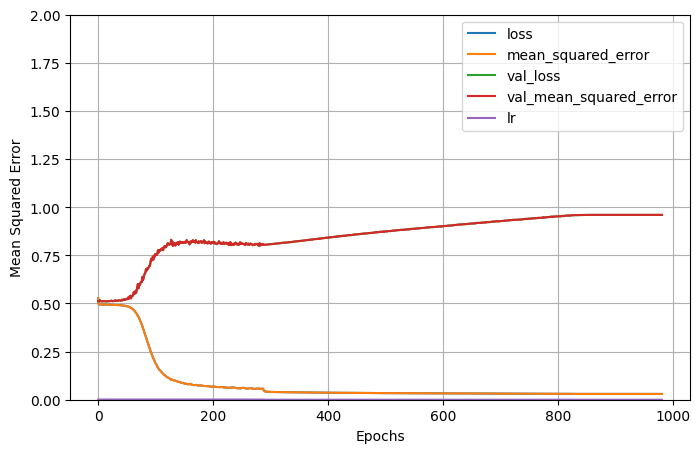

In [8]:
plot_model_history(history)

In [9]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    val_fluxes_array[n],
    val_amp_phase_array[n][0],
    val_amp_phase_array[n][1]
    )

1/1 [==============================] - 0s 70ms/step


In [10]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n][0],
    train_amp_phase_array[n][1]
    )

1/1 [==============================] - 0s 17ms/step
